This notebook is an example for how to embed plots directly from Ferret into a Jupyter Notebook using ferretmagic.  Many thanks to Patrick Brockmann and the [ferretmagic documentation](https://github.com/PBrockmann/C-CASCADES_notebooks/blob/master/ferretBasics.ipynb) for providing an excellent starting point!

In [2]:
#=======================
# Initialization needed for HPC grid
#=======================
import sys
sys.path.append('/mnt/local/pyferret/lib/python3.6/site-packages')
import pyferret
pyferret.addenv(FER_DIR='/mnt/local/pyferret', FER_DAT='/mnt/local/FerretDatasets')
pyferret.start(journal=False, quiet=True, unmapped=True)
#========================
%load_ext ferretmagic

# Plot the time series of average NA sea level in VIKING20

Use the regridded, lower resolution data for this calculation
where we find the mean sea level over the NA for each year.

In [6]:
%%ferret

cancel data/all
!use /home/jovyan/data/1_mesh_mask.nc
!use /home/jovyan/data/V20_1948_2009_SSH.nc
use /mnt/courses/eos2585/V20_1958_2009_SSH_regridded_annual.nc
!use coads_climatology
show data


currently SET data sets:
 1> /mnt/courses/eos2585/V20_1958_2009_SSH_regridded_annual.nc (default)
 name title I J K L
 TIME ... ... ... 1:52
 (invalid coordinate axis)
 SSH 1:89 1:85 ... 1:52
 GLAMT 1:89 1:85 ... ...
 GPHIT 1:89 1:85 ... ...


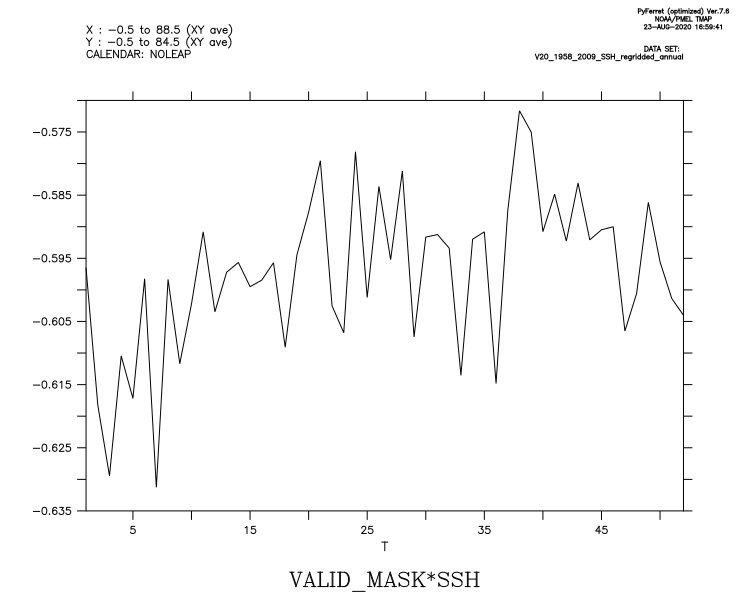

In [21]:
%%ferret
! According to https://ferret.pmel.noaa.gov/Ferret/faq/setting-a-missing-value
! when an else is omitted, the values not picked up by the if are left as
! missing.  This is handy way to create a mask.
let valid_mask = if (ssh ge -10.0 and ssh le 10.0) then 1
let ssh_masked = valid_mask*ssh
plot ssh_masked[i=@AVE,j=@AVE]


# Plot the time series of fill values from the original data

The values in the land boxes in the original data are all the same - this is the
removed global scale variability.  Compare the size of that signal to the size
of the variability contained in the regridded data.

In [ ]:
%%ferret


! Enter_GO land
! Exit_GO


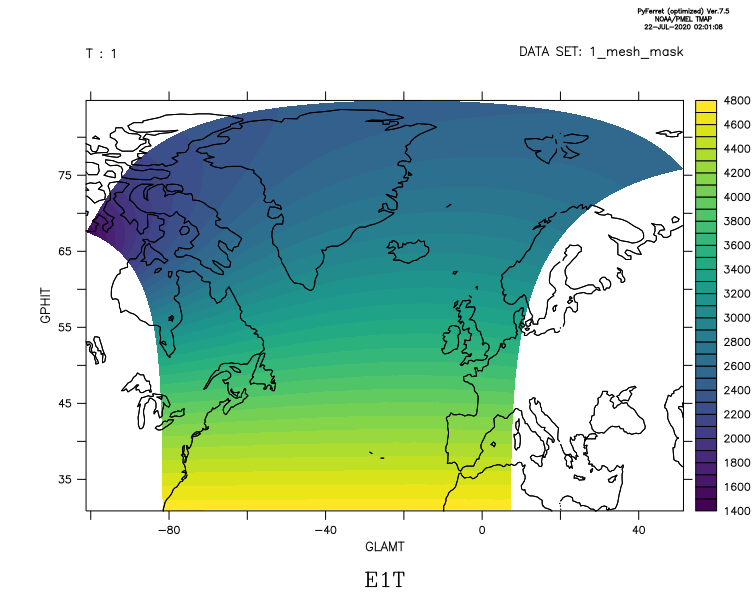

In [5]:
%%ferret
set memory /size=2000
! As in regular ferret, there are sometimes boundary errors when making
! plots in curvilinear coordinates.  To bypass this, explicitly plot
! only a subset of the data. Kernal crashes were caused by insufficient
! amounts of memory set in Docker Desktop preferences.
shade e1t[d=1,i=2:1782,j=2:1718],glamt[d=1,i=2:1782,j=2:1718],gphit[d=1,i=2:1782,j=2:1718]; go land

! Enter_GO land
! Exit_GO


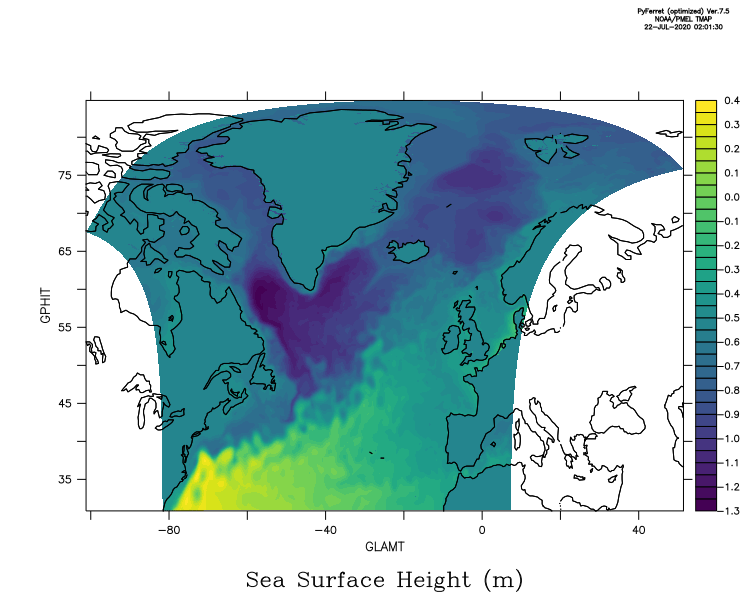

In [6]:
%%ferret
set memory /size=9000
shade sossheig[d=2,l=1:10@AVE,i=2:1782,j=2:1718],glamt[d=1,i=2:1782,j=2:1718],gphit[d=1,i=2:1782,j=2:1718]; go land

In [ ]:
%%ferret
plot /symbol=28 sossheig[d=2,i=1783,j=2]
plot /over sossheig[d=2,i=1783,j=100]
plot /over /symbol=4 /color=3 sossheig[d=2,i=2,j=200]
!plot /over /color=4 sossheig[d=2,i=@AVE,j=@AVE,l=1:200]
!plot /over /color=4 sossheig[d=2,i=@AVE,j=@AVE,l=201:400]
plot /over /color=4 sossheig[d=2,i=@AVE,j=@AVE,l=401:600]
plot /over /color=4 sossheig[d=2,i=@AVE,j=@AVE,l=601:800]
plot /over /color=4 sossheig[d=2,i=@AVE,j=@AVE,l=801:1000]

! Enter_GO land
! Exit_GO


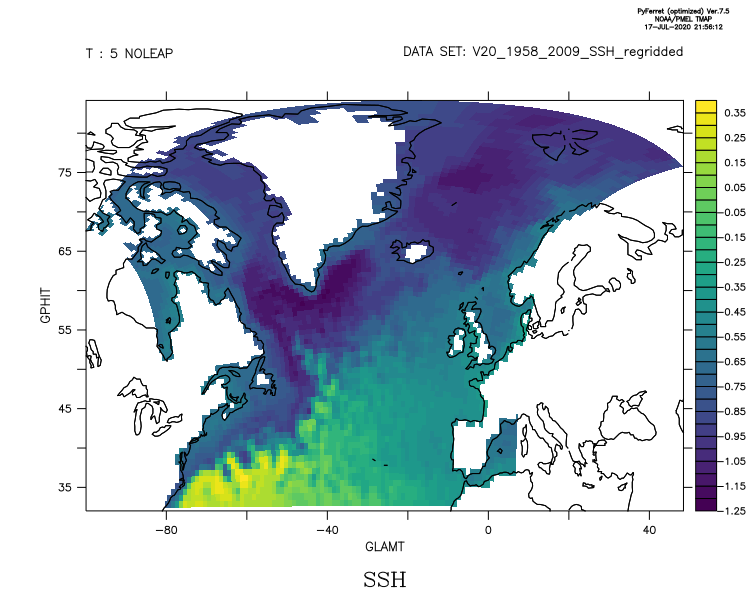

In [5]:
%%ferret
shade /i=2:2000 /j=2:2000 ssh[l=5],glamt,gphit; go land

In [7]:
ll=42
print(str(ll+1),str(ll))

43 42
